In [1]:
import yfinance  as yf
import datetime as dt
import numpy as np
import pandas as pd

In [2]:
start=dt.datetime(2022,7,1)
end=dt.datetime(2023,7,28)
symbol='SBIN.NS'


In [3]:
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-01,463.350006,468.799988,460.549988,466.850006,457.950867,9405495
2022-07-04,466.850006,474.149994,466.850006,473.450012,464.425049,9186358
2022-07-05,475.149994,480.000000,471.000000,472.149994,463.149811,12003244
2022-07-06,475.149994,481.000000,473.899994,479.950012,470.801147,12059857
2022-07-07,484.000000,488.250000,481.600006,486.750000,477.471527,11497832
...,...,...,...,...,...,...
2023-07-21,610.000000,619.500000,609.000000,615.099976,615.099976,21040281
2023-07-24,615.049988,621.900024,614.299988,617.650024,617.650024,11756364
2023-07-25,621.799988,621.799988,604.200012,609.599976,609.599976,18503305


In [5]:
stk_data=stk_data[['Open','High','Low','Close']]

In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2022-07-01,463.350006,468.799988,460.549988,466.850006
2022-07-04,466.850006,474.149994,466.850006,473.450012
2022-07-05,475.149994,480.000000,471.000000,472.149994
2022-07-06,475.149994,481.000000,473.899994,479.950012
2022-07-07,484.000000,488.250000,481.600006,486.750000
...,...,...,...,...
2023-07-21,610.000000,619.500000,609.000000,615.099976
2023-07-24,615.049988,621.900024,614.299988,617.650024
2023-07-25,621.799988,621.799988,604.200012,609.599976


In [7]:
column='Open'

In [8]:

from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)


Len: (266, 1)


In [9]:
training_size=round(len(data1)*0.80)

In [10]:
print(training_size)

213


In [11]:
X_train=data1[:training_size]
X_test=data1[training_size:]

In [12]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (213, 1)
X_test: (53, 1)


In [13]:
y_train=data1[:training_size]
y_test=data1[training_size:]

In [14]:
X_train

array([[0.        ],
       [0.0215783 ],
       [0.07274962],
       [0.07274962],
       [0.12731194],
       [0.15813808],
       [0.13347717],
       [0.13347717],
       [0.15043155],
       [0.14334157],
       [0.11837228],
       [0.13070274],
       [0.15197285],
       [0.23212083],
       [0.28637477],
       [0.308878  ],
       [0.30856981],
       [0.33508022],
       [0.32028352],
       [0.43064127],
       [0.44204679],
       [0.40505542],
       [0.42262655],
       [0.48427884],
       [0.49506799],
       [0.44512941],
       [0.37392109],
       [0.3588162 ],
       [0.34926017],
       [0.38440205],
       [0.43125764],
       [0.4038223 ],
       [0.39149184],
       [0.42324292],
       [0.34309495],
       [0.27681874],
       [0.34309495],
       [0.36128245],
       [0.37268797],
       [0.29562261],
       [0.33816284],
       [0.36313194],
       [0.45406906],
       [0.45406906],
       [0.46023429],
       [0.43803962],
       [0.44790384],
       [0.532

In [15]:
from sklearn.metrics import mean_squared_error
trends = ['add', 'add', 'add', 'add'] 

In [16]:
#from statsmodels.tsa.api import ExponentialSmoothing
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing


In [17]:
model = ExponentialSmoothing(X_train,trend='add', seasonal=None)
model_fit = model.fit()
y_pred = model_fit.predict(start=len(X_train), end=len(data1)-1)
len(y_pred)
       

53

In [18]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred,squared=False)

In [25]:
mse

0.08072905235624069

In [19]:
model_fit = model.fit()

In [20]:
forecast=model_fit.predict(len(data1), len(data1)+5)

In [21]:
forecast

array([0.86073273, 0.86396323, 0.86719373, 0.87042423, 0.87365474,
       0.87688524])

In [22]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [23]:
forecast_stock_price_test_oriF

,Closefore
0,602.960839
1,603.484826
2,604.008814
3,604.532801
4,605.056788
5,605.580776


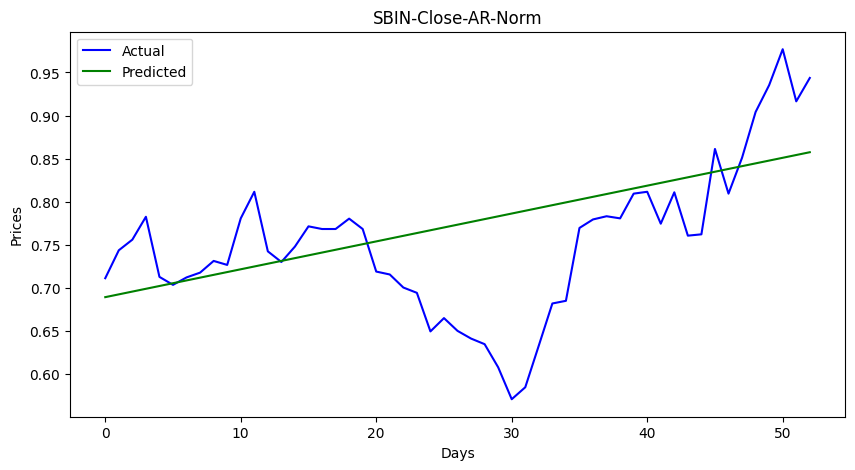

In [24]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","SBIN-Close-AR-Norm","Days","Prices")